# Example: April 2018

## Dependencies

In [14]:
include(joinpath(@__DIR__, "main.jl"));

## Loading Data

In [2]:
file = joinpath(@__DIR__, "..", "data", "afai-2018-04.nc")
ncinfo(file)


##### NetCDF File #####

/Users/gagebonner/Desktop/Repositories/SargassumFromAFAI.jl/data/afai-2018-04.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
latitude                                            2534                      
time                                                4                         
longitude                                           4001                      

##### Variables #####

Name                            Type            Dimensions                      
--------------------------------------------------------------------------------
AFAI                            FLOAT           longitude latitude time         
latitude                        DOUBLE          latitude                        
time                            DOUBLE          time                            
longitude                       DOUBLE    

In [3]:
params = AFAIParameters();
afai = AFAI(file, params);

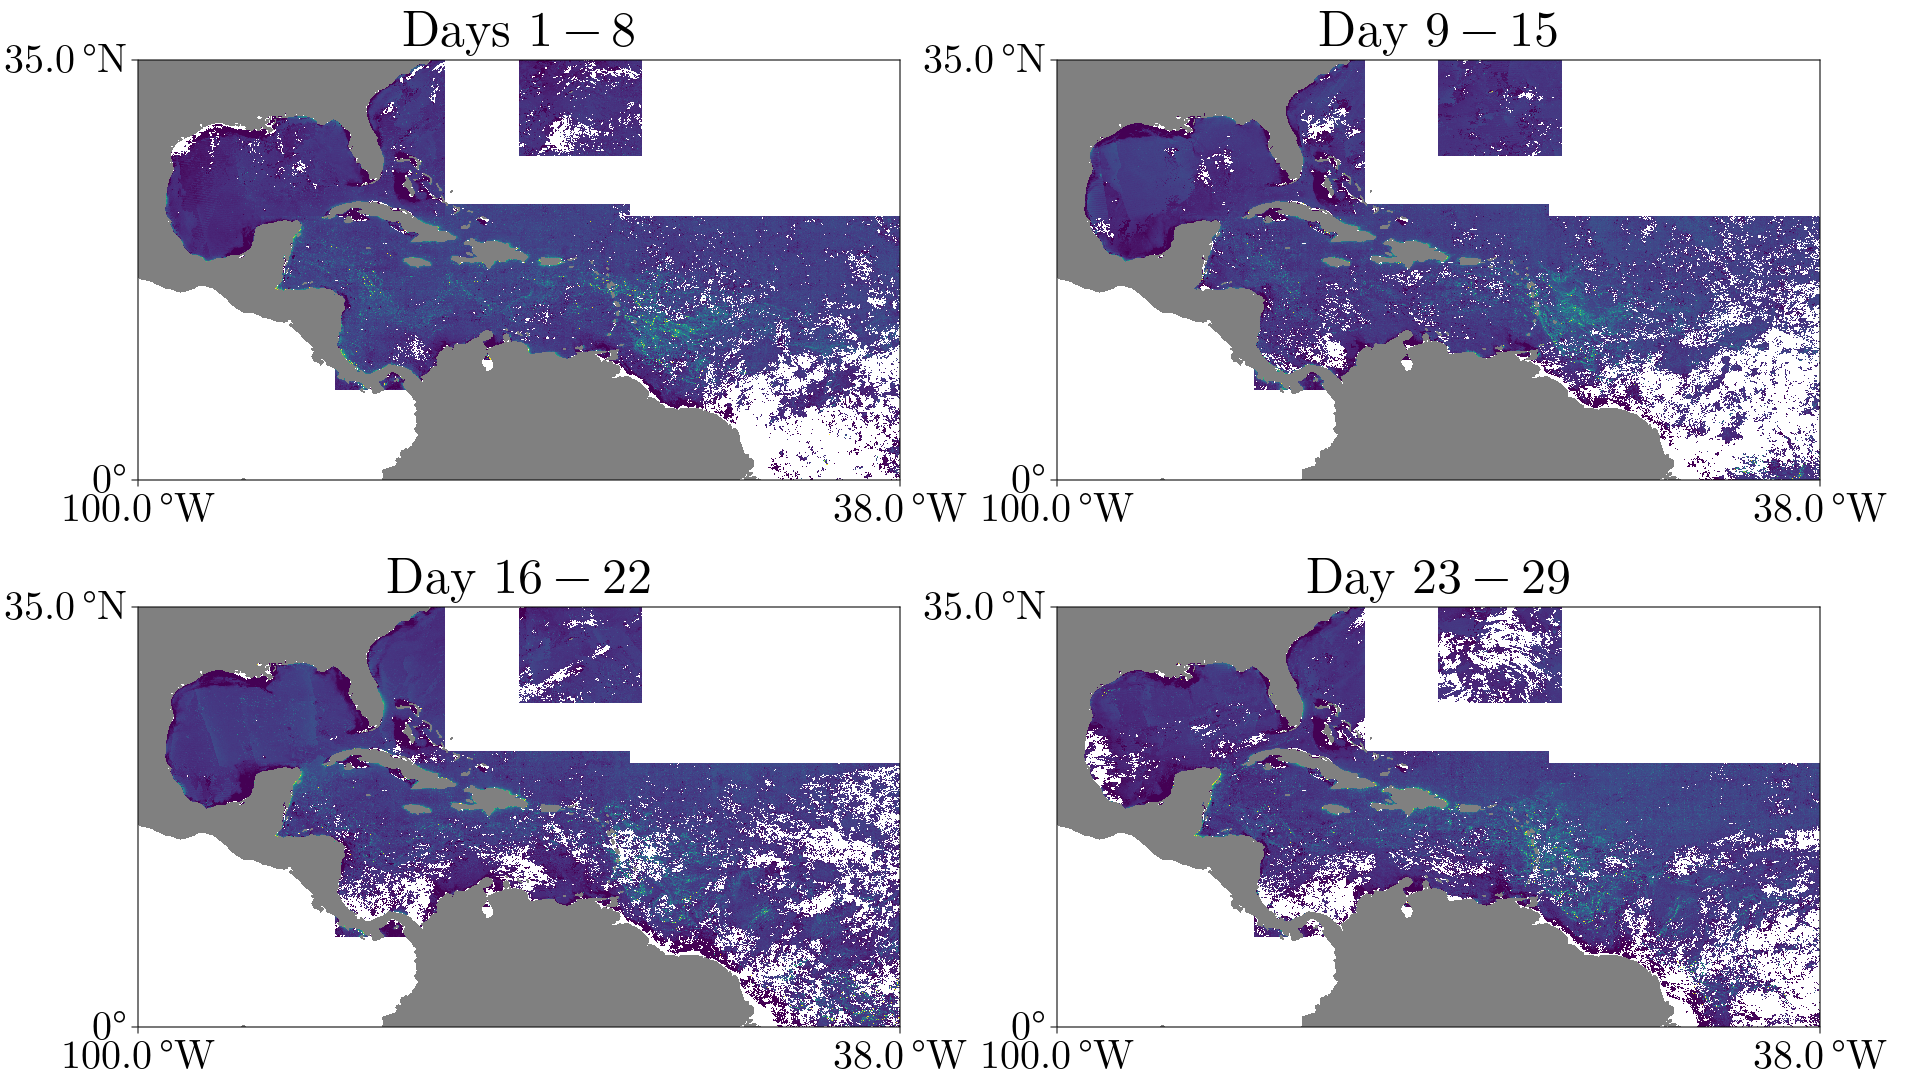

In [4]:
plot(afai)

## Masking the coast

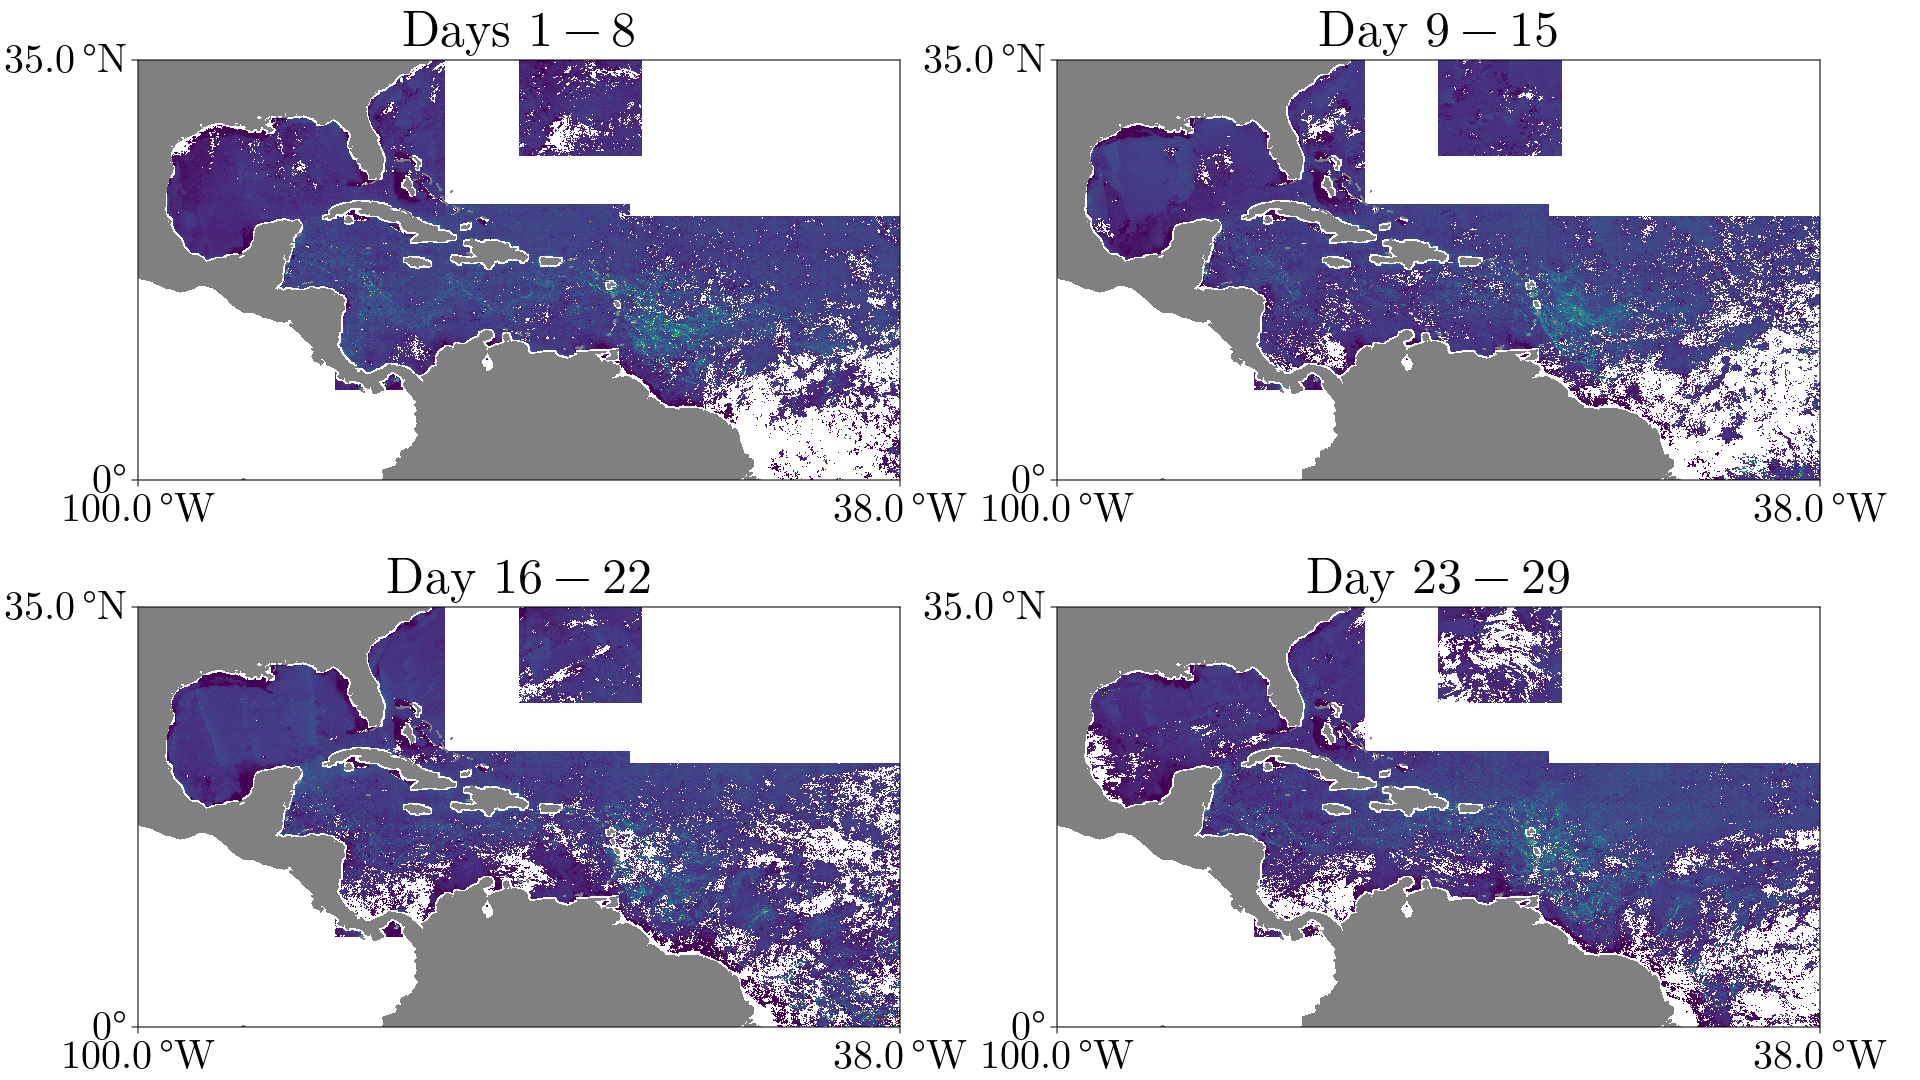

In [5]:
coast_mask = CoastMask(afai)
coast_masked!(afai, coast_mask)
plot(afai)

## Step 1: Pixel Classification

In [6]:
afai_median_background = afai_median(afai);

┌ Info: Compuing AFAI median, time slice 1/4
└ @ Main /Users/gagebonner/Desktop/Repositories/SargassumFromAFAI.jl/src/main.jl:262
┌ Info: Compuing AFAI median, time slice 2/4
└ @ Main /Users/gagebonner/Desktop/Repositories/SargassumFromAFAI.jl/src/main.jl:262


┌ Info: Compuing AFAI median, time slice 3/4
└ @ Main /Users/gagebonner/Desktop/Repositories/SargassumFromAFAI.jl/src/main.jl:262
┌ Info: Compuing AFAI median, time slice 4/4
└ @ Main /Users/gagebonner/Desktop/Repositories/SargassumFromAFAI.jl/src/main.jl:262


In [7]:
classification = pixel_classification(afai, afai_median = afai_median_background);

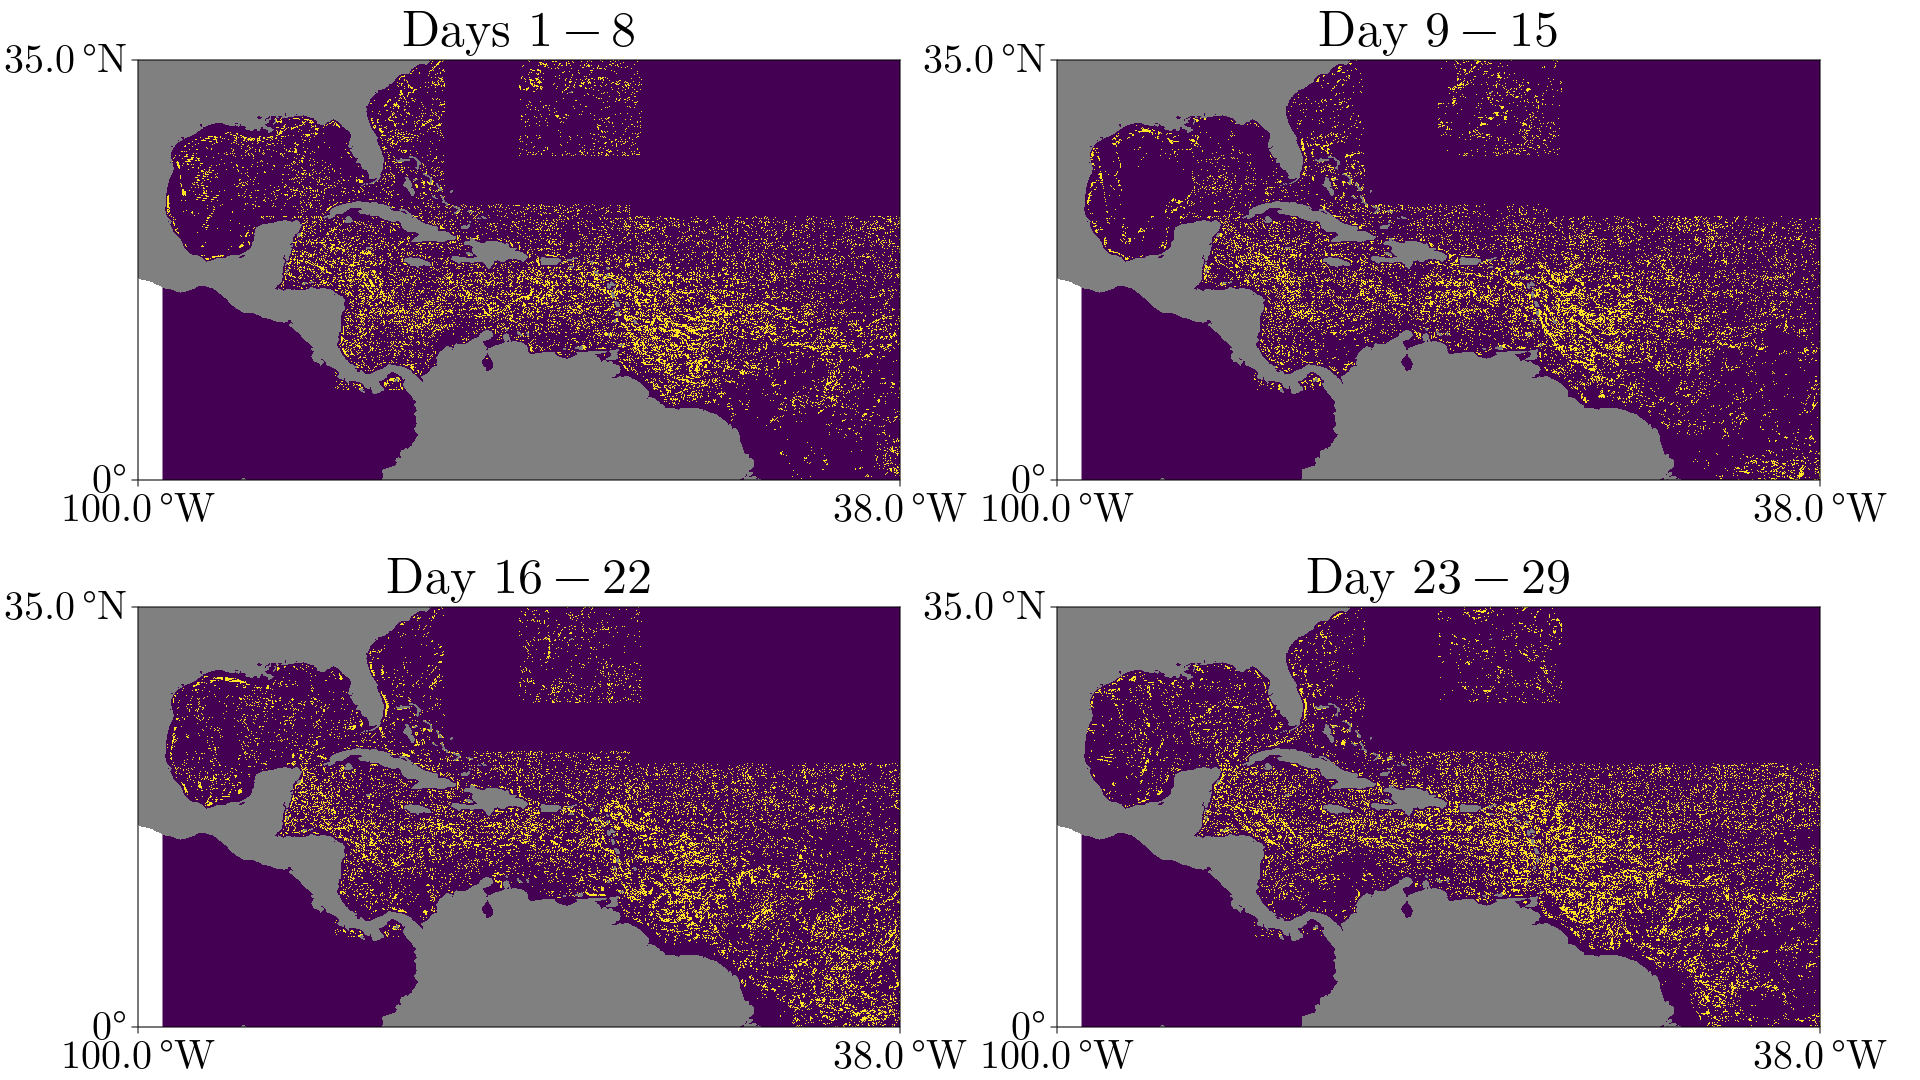

In [8]:
valid_pixels = zeros(eltype(afai.afai), size(afai.afai))
valid_pixels[classification] .= 1.0
afai_class = deepcopy(afai)
afai_class.afai = valid_pixels
plot(afai_class)

## Step 2: Pixel Unmixing

In [9]:
unmixed = pixel_unmixing(afai, pixel_classification = classification);

## Step 3: Coverage

In [10]:
lon_bins, lat_bins, coverage_tot = coverage(afai, unmixed = unmixed)
distribution = SargassumDistribution(lon_bins, lat_bins, DateTime(2018, 4), coverage_tot)

SargassumDistribution{Float64, Float32}([-97.78250000000001, -97.3325, -96.8825, -96.43250000000002, -95.98250000000002, -95.53250000000001, -95.0825, -94.6325, -94.18250000000002, -93.73250000000002  …  -41.982499999999995, -41.532500000000006, -41.08250000000001, -40.6325, -40.1825, -39.732499999999995, -39.282500000000006, -38.83250000000001, -38.3825, -38.075], [0.29253849190682985, 0.8926174496644297, 1.4926964074220292, 2.0927753651796293, 2.6928543229372286, 3.292933280694828, 3.893012238452428, 4.493091196210028, 5.093170153967627, 5.693249111725227  …  32.69680221081721, 33.296881168574814, 33.89696012633241, 34.49703908409001, 35.097118041847615, 35.69719699960521, 36.29727595736281, 36.89735491512042, 37.49743387287801, 37.9024871693644], DateTime("2018-04-01T00:00:00"), Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0008308048 … 0.0 0.0; 0.0 0.0008860342 … 0.0 0.0])

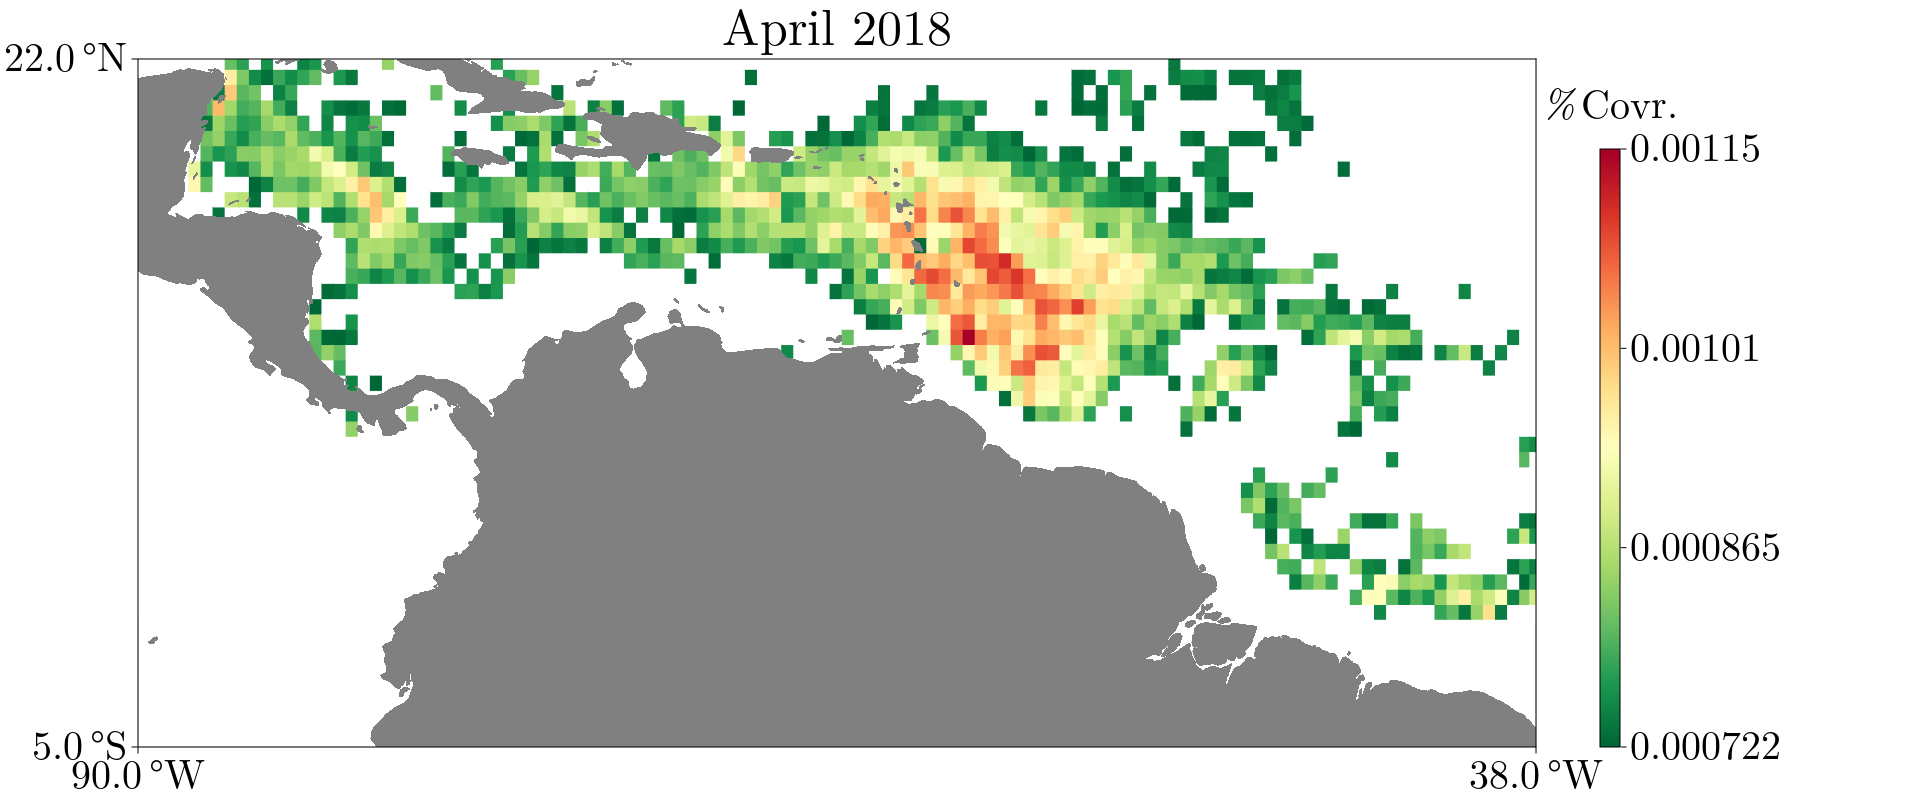

In [11]:
plot(distribution)

## High-level Interface

┌ Info: Compuing AFAI median, time slice 1/4
└ @ Main /Users/gagebonner/Desktop/Repositories/SargassumFromAFAI.jl/src/main.jl:262
┌ Info: Compuing AFAI median, time slice 2/4
└ @ Main /Users/gagebonner/Desktop/Repositories/SargassumFromAFAI.jl/src/main.jl:262


┌ Info: Compuing AFAI median, time slice 3/4
└ @ Main /Users/gagebonner/Desktop/Repositories/SargassumFromAFAI.jl/src/main.jl:262
┌ Info: Compuing AFAI median, time slice 4/4
└ @ Main /Users/gagebonner/Desktop/Repositories/SargassumFromAFAI.jl/src/main.jl:262


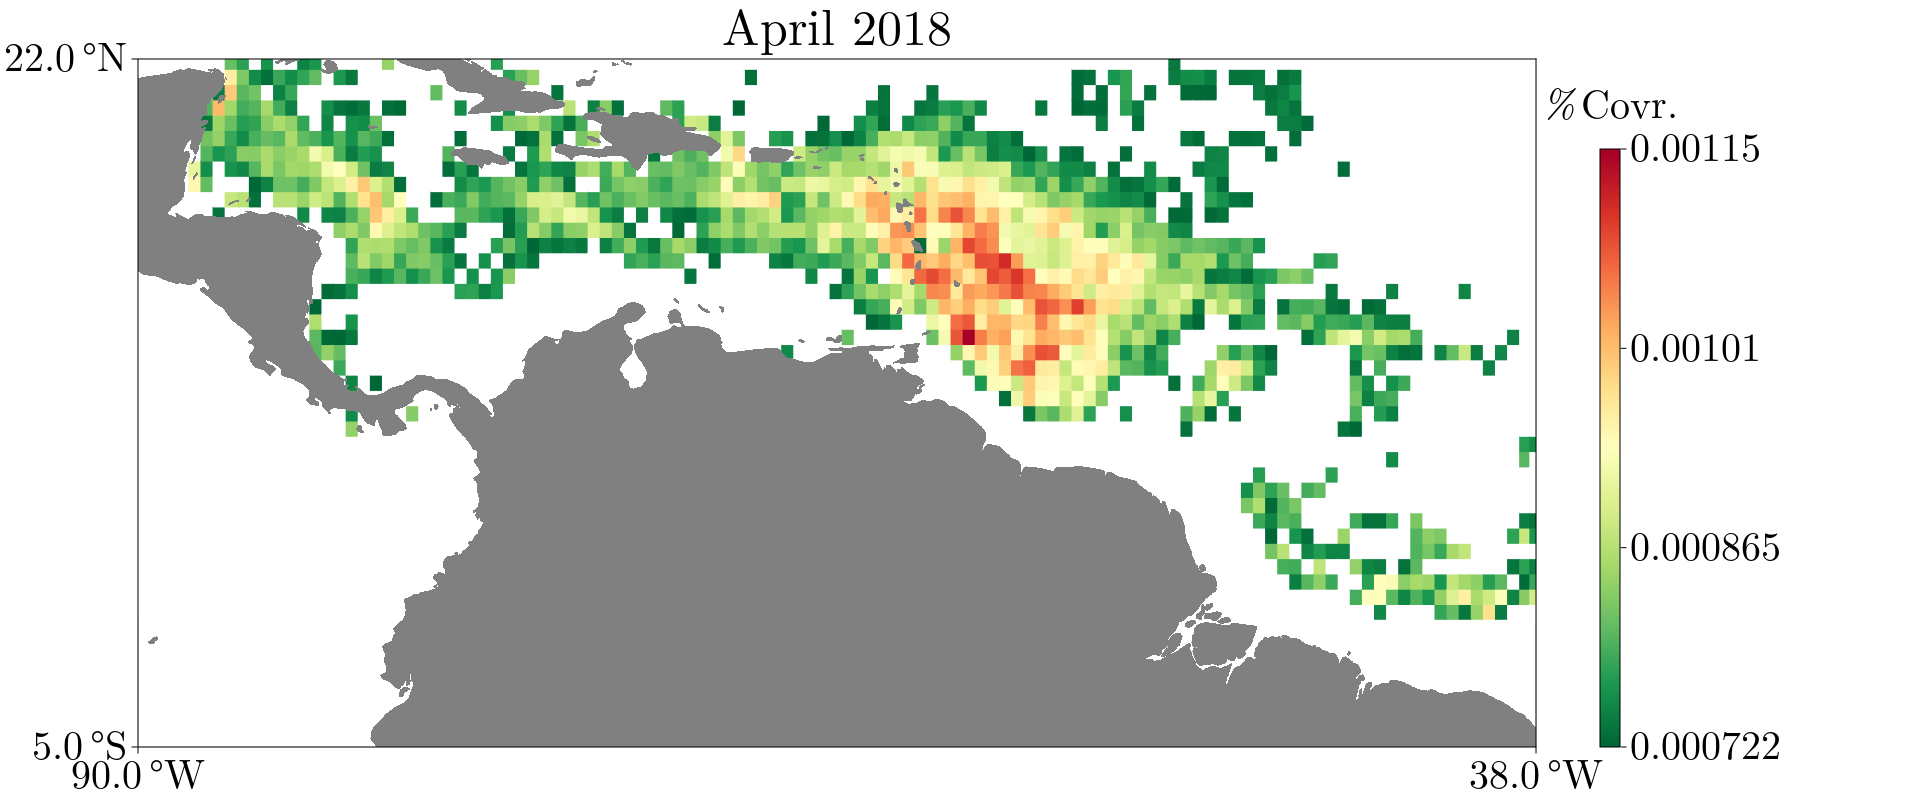

In [15]:
file = joinpath(@__DIR__, "..", "data", "afai-2018-04.nc")
distribution2 = afai_to_distribution(file)
plot(distribution2)